# Figure - Regularization comparison

Note: You will need `hyperspy` to run this plotting notebook

In [1]:
import os
work_dir = "H:/workspace/ptyrad_paper"
os.chdir(work_dir)
print("Current working dir: ", os.getcwd())

Current working dir:  H:\workspace\ptyrad_paper


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

## Regularization comparison

In [3]:
# logs 46332 - 46337
base_path = "03_output/tBL_WSe2/20250122_ptyrad_regularization/"

path_none             = os.path.join(base_path, "full_N16384_dp128_flipT100_random16_p12_1obj_12slice_dz1_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr5e-4_sng1.0_aff1_0_-3_0", "model_iter0200.pt")
path_kzf1             = os.path.join(base_path, "full_N16384_dp128_flipT100_random16_p12_1obj_12slice_dz1_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr5e-4_kzf1_sng1.0_aff1_0_-3_0", "model_iter0200.pt")
path_kzf1_opos        = os.path.join(base_path, "full_N16384_dp128_flipT100_random16_p12_1obj_12slice_dz1_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr5e-4_kzf1_opos_sng1.0_aff1_0_-3_0", "model_iter0200.pt")
path_kzf1_opos_spr    = os.path.join(base_path, "full_N16384_dp128_flipT100_random16_p12_1obj_12slice_dz1_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr5e-4_kzf1_opos_sng1.0_spr0.1_aff1_0_-3_0", "model_iter0200.pt")
path_kzf01_opos_spr   = os.path.join(base_path, "full_N16384_dp128_flipT100_random16_p12_1obj_12slice_dz1_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr5e-4_kzf0.1_opos_sng1.0_spr0.1_aff1_0_-3_0", "model_iter0200.pt")
path_ozblur1_opos_spr = os.path.join(base_path, "full_N16384_dp128_flipT100_random16_p12_1obj_12slice_dz1_Adam_plr1e-4_oalr5e-4_oplr5e-4_slr5e-4_ozblur1_oathr0.98_opos_sng1.0_spr0.1_aff1_0_-3_0", "model_iter0200.pt")

In [4]:
ckpt_none             = torch.load(path_none, weights_only=False)
ckpt_kzf1             = torch.load(path_kzf1, weights_only=False)
ckpt_kzf1_opos        = torch.load(path_kzf1_opos, weights_only=False)
ckpt_kzf1_opos_spr    = torch.load(path_kzf1_opos_spr, weights_only=False)
ckpt_kzf01_opos_spr   = torch.load(path_kzf01_opos_spr, weights_only=False)
ckpt_ozblur1_opos_spr = torch.load(path_ozblur1_opos_spr, weights_only=False)

In [5]:
# Crop the edges of the object canvas
crop_pos   = ckpt_none['model_attributes']['crop_pos'].cpu().numpy() + np.array(ckpt_none['optimizable_tensors']['probe'].shape[-2:])//2
y_min, y_max = crop_pos[:,0].min(), crop_pos[:,0].max()
x_min, x_max = crop_pos[:,1].min(), crop_pos[:,1].max()

In [6]:
obj_none             = ckpt_none['optimizable_tensors']['objp'].cpu().numpy().squeeze()[:, y_min:y_max, x_min:x_max]
obj_kzf1             = ckpt_kzf1['optimizable_tensors']['objp'].cpu().numpy().squeeze()[:, y_min:y_max, x_min:x_max]
obj_kzf1_opos        = ckpt_kzf1_opos['optimizable_tensors']['objp'].cpu().numpy().squeeze()[:, y_min:y_max, x_min:x_max]
obj_kzf1_opos_spr    = ckpt_kzf1_opos_spr['optimizable_tensors']['objp'].cpu().numpy().squeeze()[:, y_min:y_max, x_min:x_max]
obj_kzf01_opos_spr   = ckpt_kzf01_opos_spr['optimizable_tensors']['objp'].cpu().numpy().squeeze()[:, y_min:y_max, x_min:x_max]
obj_ozblur1_opos_spr = ckpt_ozblur1_opos_spr['optimizable_tensors']['objp'].cpu().numpy().squeeze()[:, y_min:y_max, x_min:x_max]

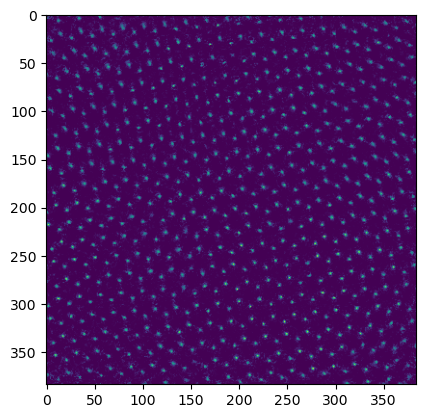

In [7]:
plt.figure()
plt.imshow(obj_ozblur1_opos_spr[0])
plt.show()

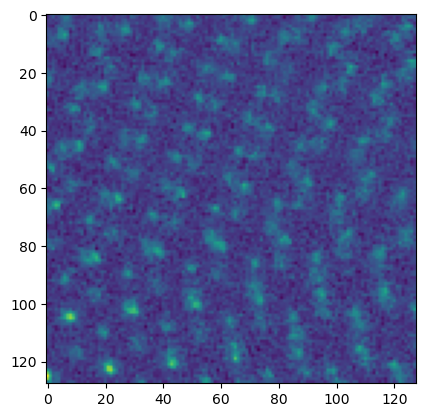

In [8]:
window_roi = (188,26,316,154) # y_min,x_min,y_max,x_max
window_none = obj_kzf1[:, window_roi[0]:window_roi[2], window_roi[1]:window_roi[3]]
plt.figure()
plt.imshow(window_none[0])
plt.show()

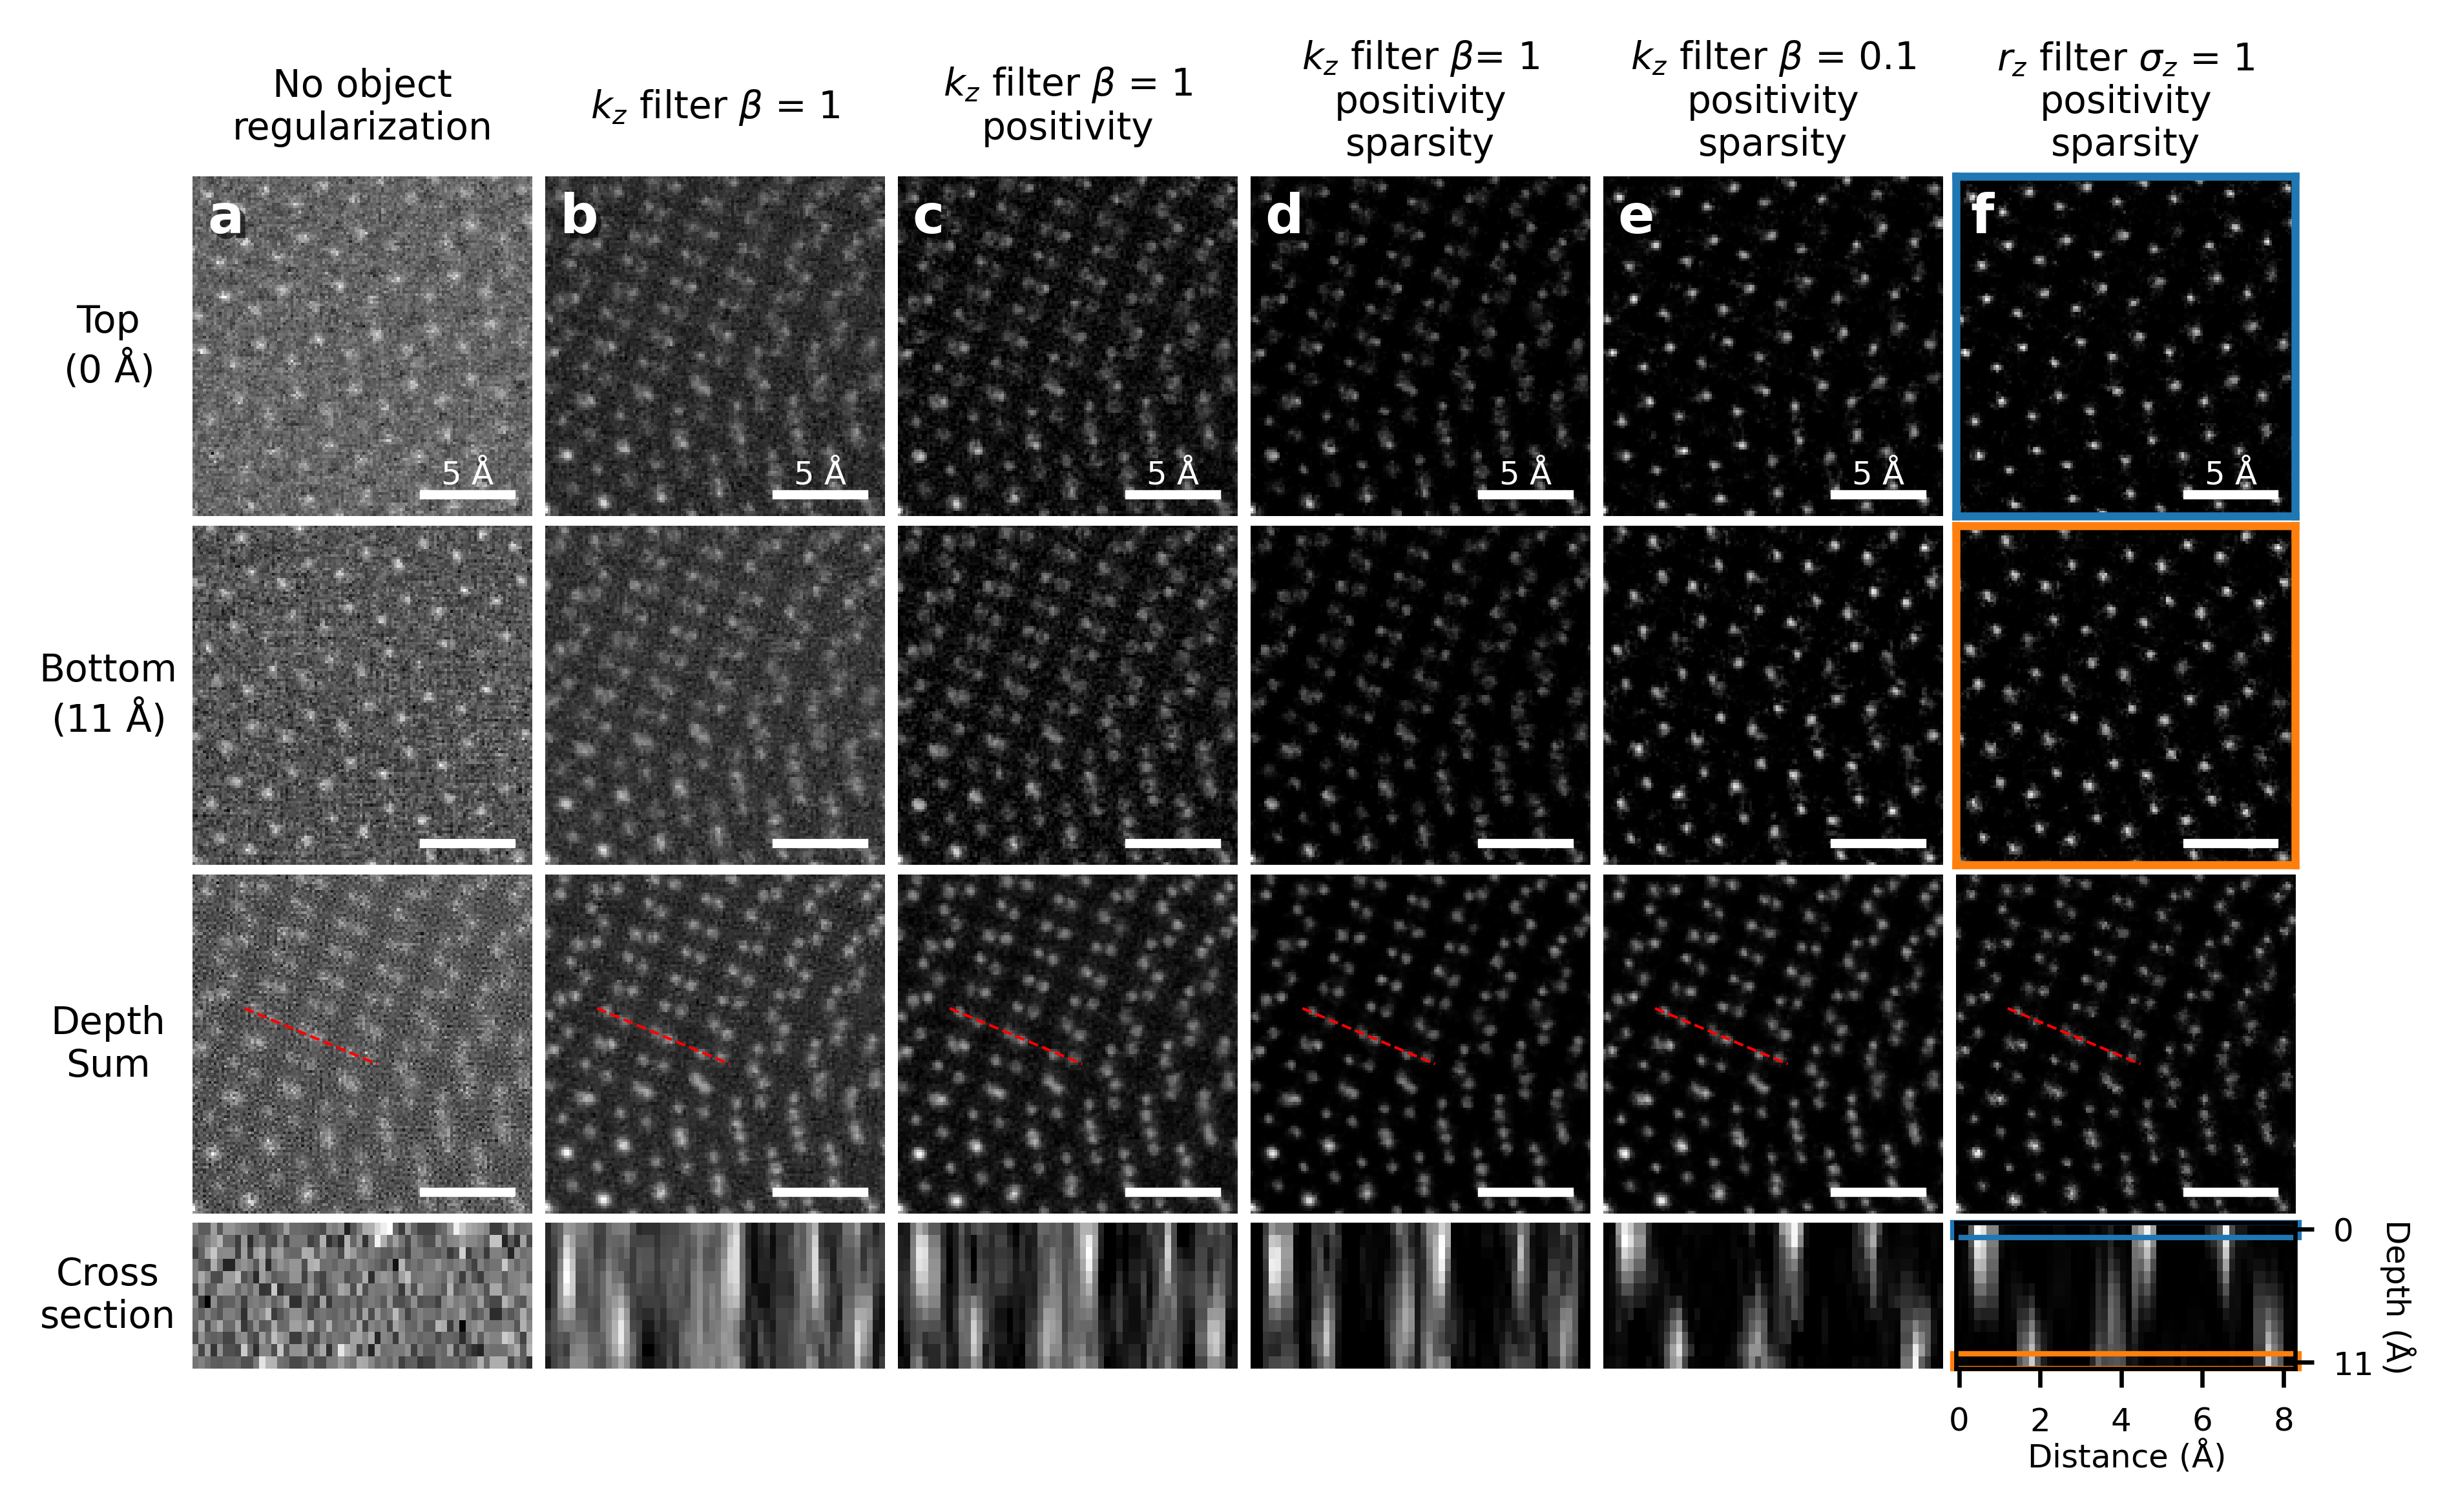

In [9]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import hyperspy.api as hs

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import matplotlib.patches as patches

# Define the figure size and GridSpec
fig = plt.figure(figsize=(7, 4), dpi=600)
grid = GridSpec(4, 6, figure=fig, 
                hspace=0.025,  # Vertical spacing
                wspace=0.039,  # Horizontal spacing
                height_ratios=[1, 1, 1, 0.43],  # Custom row heights
                width_ratios=[1, 1, 1, 1, 1, 1])  # Equal column widths

# Objects
objs = [obj_none, 
        obj_kzf1, 
        obj_kzf1_opos, 
        obj_kzf1_opos_spr, 
        obj_kzf01_opos_spr, 
        obj_ozblur1_opos_spr]

# Top labels
top_labels = ["No object\nregularization", "$k_z$ filter $\\beta$ = 1", "$k_z$ filter $\\beta$ = 1\npositivity", 
              "$k_z$ filter $\\beta$= 1\npositivity\nsparsity", "$k_z$ filter $\\beta$ = 0.1\npositivity\nsparsity", 
              "$r_z$ filter $\\sigma_z$ = 1\npositivity\nsparsity"]
top_pads = [7,11,7,4,4,4]

# Side labels
side_labels = ["Top\n(0 $\\mathrm{\\AA}$)", "Bottom\n(11 $\\mathrm{\\AA}$)", "Depth\nSum", "Cross\nsection"]

# Panel labels
panel_labels = ['a', 'b', 'c', 'd', 'e', 'f']
shadow_offset = (2, 2)

# Scale bar settings
scale_bar_length = 34  # Length of the scale bar in pixels (1 px = 0.1494 Ang)
scale_bar_label = "5 $\\mathrm{\\AA}$"  # Label for the scale bar
scale_bar_color = "white"
fontprops = fm.FontProperties(size=6)

# Window and Line ROI
window_roi = (188, 26, 316, 154)  # y0, x0, y1, x1 for Python convention
line_roi = hs.roi.Line2DROI(19, 50, 69, 71, 1)  # x1, y1, x2, y2 for hyperspy convention, the coordinate is within the window already

for i, obj in enumerate(objs):
    # Get image and cross-sectional view
    window = obj[:, window_roi[0]:window_roi[2], window_roi[1]:window_roi[3]]
    im = hs.signals.Signal2D(window)
    cross_view = line_roi(im).data
      
    # Main images
    ax1 = fig.add_subplot(grid[0, i])
    ax1.imshow(window[0], cmap='gray', origin='upper')
    ax1.axis('off')
    
    # Add top label
    ax1.set_title(top_labels[i], fontsize=7, pad=top_pads[i], loc='center', ha='center')
    # Add label with text shadow
    ax1.text(5 + shadow_offset[0], 5 + shadow_offset[1], panel_labels[i], color='black', fontsize=10, fontweight='bold', va='top', ha='left', alpha=0.6)
    ax1.text(5, 5, panel_labels[i], color='white', fontsize=10, fontweight='bold', va='top', ha='left')
    
    ax2 = fig.add_subplot(grid[1, i])
    ax2.imshow(window[-1], cmap='gray', origin='upper')
    ax2.axis('off')
    
    ax3 = fig.add_subplot(grid[2, i])
    ax3.imshow(window.sum(0), cmap='gray', origin='upper')
    ax3.axis('off')
    
    # Annotate the line ROI
    line_start = (line_roi.x1, line_roi.y1)
    line_end = (line_roi.x2, line_roi.y2)
    ax3.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], color='red', linewidth=0.5, linestyle='dashed')
    
    ax4 = fig.add_subplot(grid[3, i])
    ax4.imshow(cross_view, cmap='gray', aspect=2)
    ax4.axis('off')
    
    # Allow y-ticks for last column    
    if i == 5:  # Last column
        ax4.axis('on')
        # ax4.xaxis.set_visible(False)
        ax4.yaxis.set_ticks_position('right')
        ax4.yaxis.set_label_position('right')
        ax4.set_yticks(ticks=[0,11])
        ax4.set_ylabel('Depth ($\\mathrm{\\AA}$)', fontsize=6, rotation=-90, labelpad=8)
        ax4.tick_params(axis='y', which='both', labelsize=6)  # Adjust label size if needed

        # Set x-ticks every 2 Å
        px_size = 0.1494  # Angstroms per pixel
        num_cols = cross_view.shape[-1]  # Number of columns in cross-sectional view
        max_distance = num_cols * px_size  # Maximum distance in Angstroms

        # Create tick positions at every 2 Å
        x_labels = np.arange(0, max_distance, 2)
        x_positions = x_labels / px_size  # Convert Angstroms back to pixel units

        ax4.set_xticks(ticks=x_positions)
        ax4.set_xticklabels([f"{x:.0f}" for x in x_labels])  # Round labels to integers
        ax4.set_xlabel('Distance ($\\mathrm{\\AA}$)', fontsize=6, labelpad=0)
        ax4.tick_params(axis='x', which='both', labelsize=6)
    
    # Add scale bar
    for j, ax in enumerate([ax1, ax2, ax3]):
        if j != 0:
            scalebar = AnchoredSizeBar(ax.transData, scale_bar_length, label='',
                                    loc='lower right', pad=0.5, sep=0.5, color=scale_bar_color, frameon=False, size_vertical=1.5, label_top=True,
                                    fontproperties=fontprops)
        else:
            scalebar = AnchoredSizeBar(ax.transData, scale_bar_length, scale_bar_label,
                                    loc='lower right', pad=0.5, sep=0.5, color=scale_bar_color, frameon=False, size_vertical=1.5, label_top=True,
                                    fontproperties=fontprops)
        ax.add_artist(scalebar)

    # Add side labels
    if i == 0:
        for j, ax in enumerate([ax1, ax2, ax3, ax4]):
            ax.annotate(side_labels[j], xy=(-0.25, 0.5), xycoords='axes fraction', fontsize=7, ha='center', va='center', rotation=0)  
    
    # Add boxes to right-most column
    if i == 5:
        # Add blue edge to ax1
        ax1.axis('on')
        ax2.axis('on')
        ax1.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        ax2.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        
        for spine in ax1.spines.values():
            spine.set_edgecolor('C0')
            spine.set_linewidth(1.5)

        # Add orange edge to ax2
        for spine in ax2.spines.values():
            spine.set_edgecolor('C1')
            spine.set_linewidth(1.5)

        # Add blue and orange patches to ax4
        top_box = patches.Rectangle((-0.01, 1), 1.02, -0.1, transform=ax4.transAxes, linewidth=1, edgecolor='C0', facecolor='none', clip_on=False)
        bottom_box = patches.Rectangle((-0.01, 0), 1.02, 0.1, transform=ax4.transAxes, linewidth=1, edgecolor='C1', facecolor='none', clip_on=False)
        ax4.add_patch(top_box)
        ax4.add_patch(bottom_box)

plt.savefig("05_figures/Fig_05_object_regularizations.pdf", bbox_inches="tight")
plt.savefig("05_figures/Fig_05_object_regularizations.png", bbox_inches="tight")

plt.show()
